# POPTop at M8 - compare / adjust to other gear

This unit does not seem to have the right calibration constants... although the shape looks to be good (bad offset?

- bottom data seems to end in january, but popup seems to be in May?

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

In [100]:
sample_data_dir = '/Users/bell/Programs/EcoFOCIpy/'
user_data_dir = '/Users/bell/ecoraid/2024/Moorings/24bs8a/'

In [101]:
###############################################################
# edit to point to {instrument sepcific} raw datafile 
datafile = user_data_dir+'rawconverted/24BSPOPTOP-8A/'
instrument = 'PopTop 24M8'
mooring_meta_file = user_data_dir+'logs/24BS-8A.yaml'
inst_meta_file = sample_data_dir+'staticdata/instr_metaconfig/puf_cf.yaml'
institution_meta_file = sample_data_dir+'staticdata/institutional_meta_example.yaml' #include uaf?
inst_shortname = 'puf'


In [102]:
bottom = pd.read_csv(datafile+'P-8A_bottom_data.csv',parse_dates=True,index_col='datetime')
ice = pd.read_csv(datafile+'P-8A_ice_data.csv',parse_dates=True,index_col='datetime')
sst = pd.read_csv(datafile+'P-8A_sst_data.csv',parse_dates=True,index_col='datetime')

<Axes: xlabel='datetime'>

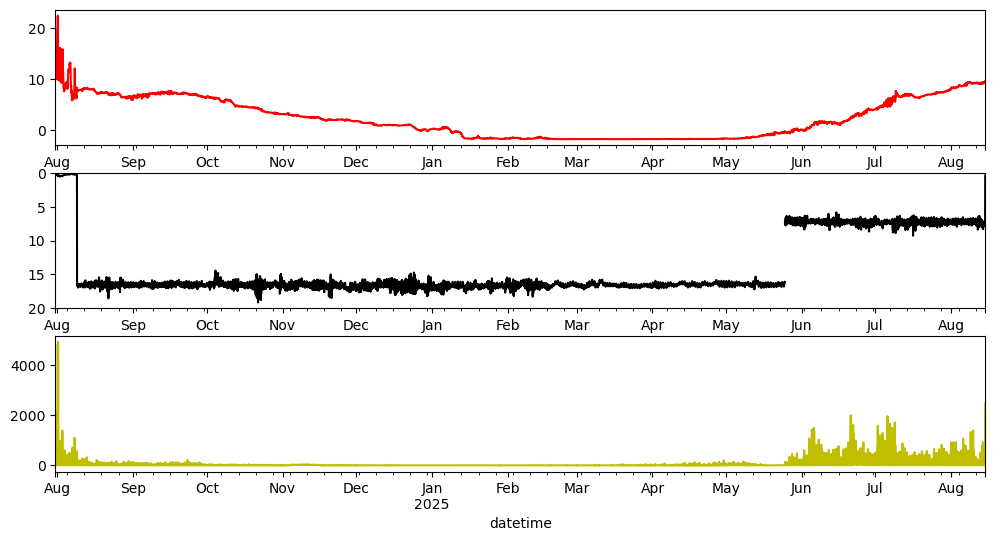

In [103]:
fig, ax = plt.subplots(3,figsize=(12, 6))
bottom.fr_temp.plot(color='r',ax=ax[0])
ice.fr_temp.plot(color='r',ax=ax[0])

(bottom.pressure * 10).plot(color='k',ax=ax[1])
(ice.pressure * 10).plot(color='k',ax=ax[1],ylim=(20,0))

(bottom.par * 10).plot(color='y',ax=ax[2])
(ice.par * 10).plot(color='y',ax=ax[2])

In [104]:
# plot against local mtr

In [105]:
mtr_data = pd.read_csv('24bs8a_s39_0017m.csv',parse_dates=True,index_col='time')

<Axes: xlabel='time'>

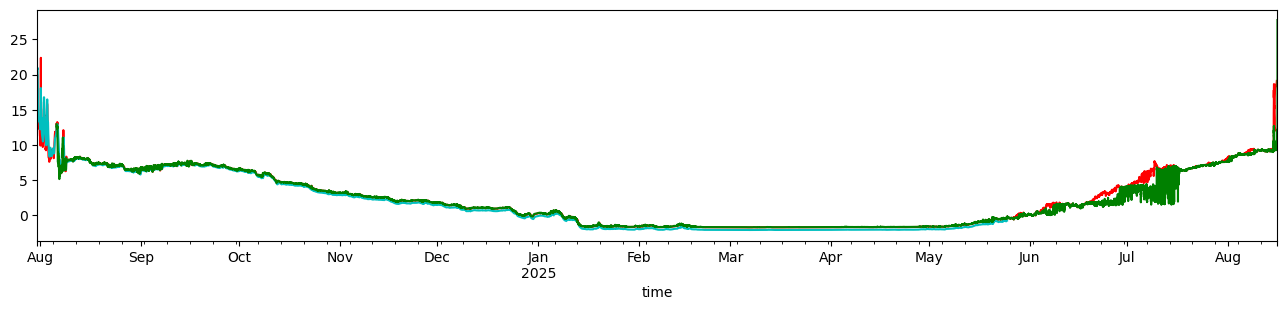

In [106]:
fig, ax = plt.subplots(1,figsize=(16, 3))
(bottom.fr_temp).plot(ax=ax,color='r')
(bottom.sr_temp).plot(ax=ax,color='c')
(ice.fr_temp).plot(ax=ax,color='r')
(sst.fr_temp).plot(ax=ax,color='r')
mtr_data.temperature.plot(ax=ax,color='g')

In [107]:
ice

,Unnamed: 0,time,pressure,fr_temp,fr_temp_ADC,sr_temp,sr_temp_ADC,temp_ref,par,fluor,tilt,depth_m,id,dep_lat,dep_lon
datetime,,,,,,,,,,,,,,,
2025-05-25 03:00:00,1,10800,0.733643,-0.246677,28155,-0.491936,28093,8518,13.263781,0,29,7.285930,24M8,62.198,-174.663
2025-05-25 04:00:00,2,14400,0.730286,-0.249479,28159,-0.523832,28138,8518,9.004274,0,29,7.252591,24M8,62.198,-174.663
2025-05-25 05:00:00,3,18000,0.726013,-0.271878,28191,-0.535158,28154,8518,4.205589,0,30,7.210161,24M8,62.198,-174.663
2025-05-25 06:00:00,4,21600,0.727539,-0.292153,28220,-0.550011,28175,8518,3.953973,0,28,7.225315,24M8,62.198,-174.663
2025-05-25 07:00:00,5,25200,0.725098,-0.314498,28252,-0.573325,28208,8518,1.905096,0,28,7.201069,24M8,62.198,-174.663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-14 17:00:00,1959,7059600,0.731506,9.313930,17577,9.313499,17603,8519,4.654904,0,26,7.264714,24M8,62.198,-174.663
2025-08-14 18:00:00,1960,7063200,0.715027,9.278328,17607,9.309739,17606,8519,7.512548,0,28,7.101054,24M8,62.198,-174.663
2025-08-14 19:00:00,1961,7066800,0.719910,9.258183,17624,9.289699,17622,8519,12.508932,0,28,7.149546,24M8,62.198,-174.663


In [108]:
bottom.index.name = 'date_time'
bottom.drop(['Unnamed: 0','time'],inplace=True,axis=1)
bottom.rename(columns={'fr_temp':'temperature'},inplace=True)

In [109]:
# save two files for netcdf - pre and post pop

import yaml
import EcoFOCIpy.io.ncCFsave as ncCFsave

## Add Deployment meta information

Two methods are available (if comming from python2 world - ordereddict was important... in py38 a dictionary is inherently ordered)

In [110]:
#just a dictionary of dictionaries - simple
with open(mooring_meta_file) as file:
    mooring_config = yaml.full_load(file)

In [111]:
#just a dictionary of dictionaries - simple
with open(institution_meta_file) as file:
    institution_config = yaml.full_load(file)

## Calculate Salinity as it wasn't included in the sbe cnv file as it usually is

## Add Instrument meta information

Time, depth, lat, lon should be added regardless (always our coordinates) but for a mooring site its going to be a (1,1,1,t) dataset
The variables of interest should be read from the data file and matched to a key for naming.  That key is in the inst_config file seen below and should represent common conversion names in the raw data

In [112]:
with open(inst_meta_file) as file:
    inst_config = yaml.full_load(file)

In [113]:
# Add meta data and prelim processing based on meta data
# Convert to xarray and add meta information - save as CF netcdf file
# pass -> data, instmeta, depmeta
puf_deep_wop_nc = ncCFsave.EcoFOCI_CFnc(df=bottom, 
                                instrument_yaml=inst_config, 
                                operation_yaml=mooring_config,
                                operation_type='mooring', 
                                instrument_id=instrument, 
                                inst_shortname=inst_shortname)
puf_deep_wop_nc

At this point, you could save your file with the `.xarray2netcdf_save()` method and have a functioning dataset.... but it would be very simple with no additional qc, meta-data, or tuned parameters for optimizing software like ferret or erddap.

In [114]:
# expand the dimensions and coordinate variables
# renames them appropriatley and prepares them for meta-filled values
puf_deep_wop_nc.expand_dimensions()

In [115]:
puf_deep_wop_nc.variable_meta_data(variable_keys=list(bottom.columns.values),drop_missing=True)
puf_deep_wop_nc.temporal_geospatioal_meta_data(depth='designed')
#adding dimension meta needs to come after updating the dimension values... BUG?
puf_deep_wop_nc.dimension_meta_data(variable_keys=['depth','latitude','longitude'])

The following steps can happen in just about any order and are all meta-data driven.  Therefore, they are not required to have a functioning dataset, but they are required to have a well described dataset

In [116]:
#add global attributes
puf_deep_wop_nc.deployment_meta_add()
puf_deep_wop_nc.get_xdf()

#add instituitonal global attributes
puf_deep_wop_nc.institution_meta_add(institution_yaml=institution_config)

#add instrument global attributes
puf_deep_wop_nc.instrument_meta_data()

#add creation date/time - provenance data
puf_deep_wop_nc.provinance_meta_add()

#provide intial qc status field
puf_deep_wop_nc.qc_status(qc_status='unknown')

## Save CF Netcdf files

Currently stick to netcdf3 classic... but migrating to netcdf4 (default) may be no problems for most modern purposes.  Its easy enough to pass the `format` kwargs through to the netcdf api of xarray.

In [117]:
# combine trim (not mandatory) and filename together (saves to test.nc without name)

depth = str(int(mooring_config['Instrumentation'][instrument]['DesignedDepth'])).zfill(4)
# mooring_yaml['Instrumentation'][self.instrument_id]['DesignedDepth'])).zfill(4) #<-- alternative
filename = "".join(mooring_config['MooringID'].split('-')).lower()+'_'+inst_shortname+'_'+depth+'m.nc'
puf_deep_wop_nc.xarray2netcdf_save(xdf = puf_deep_wop_nc.autotrim_time(),
                           filename=filename,format="NETCDF3_CLASSIC")

# don't trim the data and pass your own filename
# sbe37_wop_nc.xarray2netcdf_save(xdf = sbe37_wop_nc.get_xdf(),
#                            filename=filename,format="NETCDF4_CLASSIC")